In [454]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
iris=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
X,y=iris.iloc[:,:-1],iris.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
X, y,test_size=0.33,random_state=42)
X_train, X_test, y_train, y_test=np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
scaler=StandardScaler()
scaler.fit(X_train)
X_train,X_test=scaler.transform(X_train),scaler.transform(X_test)

X_train.shape

(100, 4)

In [455]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [456]:
model=tf.keras.Sequential(
[
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
]
)
model.compile(loss="categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy","recall","precision"])
enc = OneHotEncoder(handle_unknown='ignore')
encoding=enc.fit_transform(y_train.reshape(-1,1)).toarray()
history = model.fit(X_train, encoding, epochs=50)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.9963 - precision: 1.0000 - recall: 0.0155  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8188 - loss: 0.9726 - precision: 0.8000 - recall: 0.0153         
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8641 - loss: 0.9510 - precision: 0.8000 - recall: 0.0172         
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8372 - loss: 0.9308 - precision: 0.8000 - recall: 0.0436         
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8250 - loss: 0.8987 - precision: 1.0000 - recall: 0.1011 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7719 - loss: 0.8878 - precision: 1.0000 - recall: 0.1753 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8044 - loss: 0.8505 - precision: 1.0000 - recall: 0.2550 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8146 - loss: 0.8404 - precision: 1.0000 - recall: 0.3298 
Epoch 9/50
4/4 

In [457]:
model.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,705 (22.29 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (16.00 B)

In [458]:
y_pred=model.predict(X_test)
y_pred_classes=enc.categories_[0][y_pred.argmax(axis=1)]
model.evaluate(X_test, enc.transform(y_test.reshape(-1,1)).toarray())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8621 - loss: 0.3878 - precision: 0.8747 - recall: 0.7908 


[0.40495447667875867, 0.84, 0.78, 0.8478260869565217]

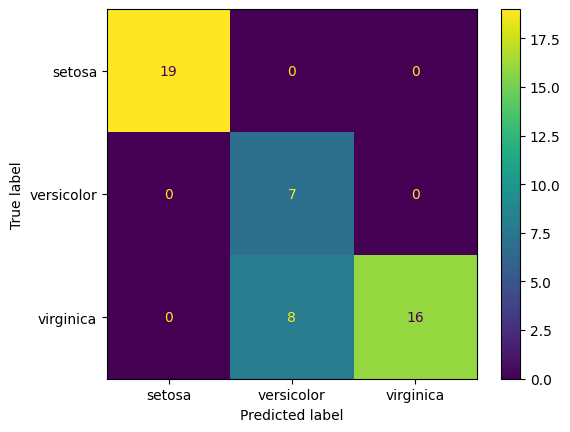

In [459]:
ConfusionMatrixDisplay.from_predictions(y_pred_classes,y_test)

In [460]:
model.save("my_model.keras")

In [461]:
class MyDense:
    def __init__(self,input_size,output_size,activation=None):
        self.input_size=input_size
        self.output_size=output_size
        self.activation=activation
        self.weight = tf.Variable(
        tf.random.uniform((input_size, output_size), minval=-0.05, maxval=0.05,dtype=tf.double),
        name="weight",
        trainable=True
)

        
    def __call__(self,X):
        return tf.matmul(X,self.weight) if self.activation is None else self.activation(tf.matmul(X,self.weight))

In [462]:
class MySequential:
    def __init__(self,layers):
        self.layers=layers
        self.weights=[l.weight for l in layers]
    def __call__(self,X):
        output=X
        for l in self.layers:
            output=l(output)
        return output
    def fit(self,x,y,epochs=30,lr=0.2999):
        for _ in range(epochs):
         y_pred=x
         with tf.GradientTape() as tape:
          for l in self.layers:
            y_pred=l(y_pred)
          cce = tf.keras.losses.CategoricalCrossentropy()
          cce=cce(y, y_pred)
         gradient= tape.gradient(cce,self.weights)
        for l,g in zip(self.layers,gradient):
            l.weight.assign_sub(lr*g)
        return y_pred 
       

In [463]:
model2=MySequential(
    [MyDense(input_size=X_train.shape[1],output_size=100,activation=tf.keras.activations.relu),
     MyDense(input_size=100,output_size=3,activation=tf.keras.activations.softmax)
    ]
)

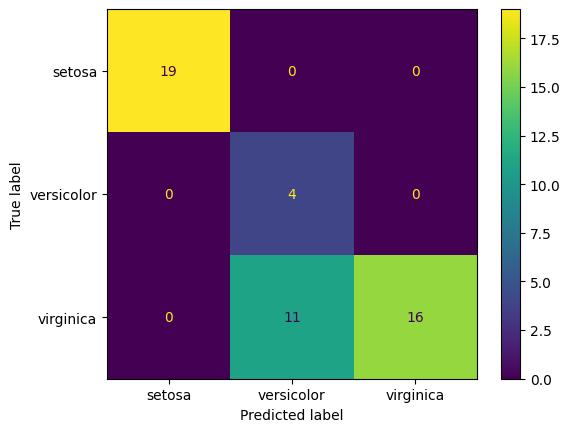

In [464]:
history2 = model2.fit(X_train, encoding, epochs=50)
ConfusionMatrixDisplay.from_predictions(enc.categories_[0][tf.math.argmax(model2(X_test),axis=1)],y_test)

